In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sb

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
df = tf.keras.preprocessing.image_dataset_from_directory("dataset\PLD_3_Classes_256\Training",shuffle=True,image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size= BATCH_SIZE)

Found 6035 files belonging to 5 classes.


In [4]:
class_names = df.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight', 'Non_Potato', 'Object']

In [5]:
len(df) #no.of imgs/batch size

189

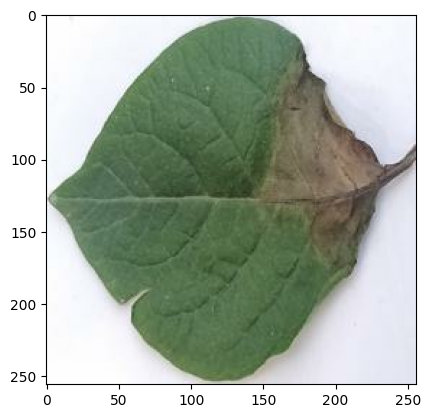

In [6]:
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

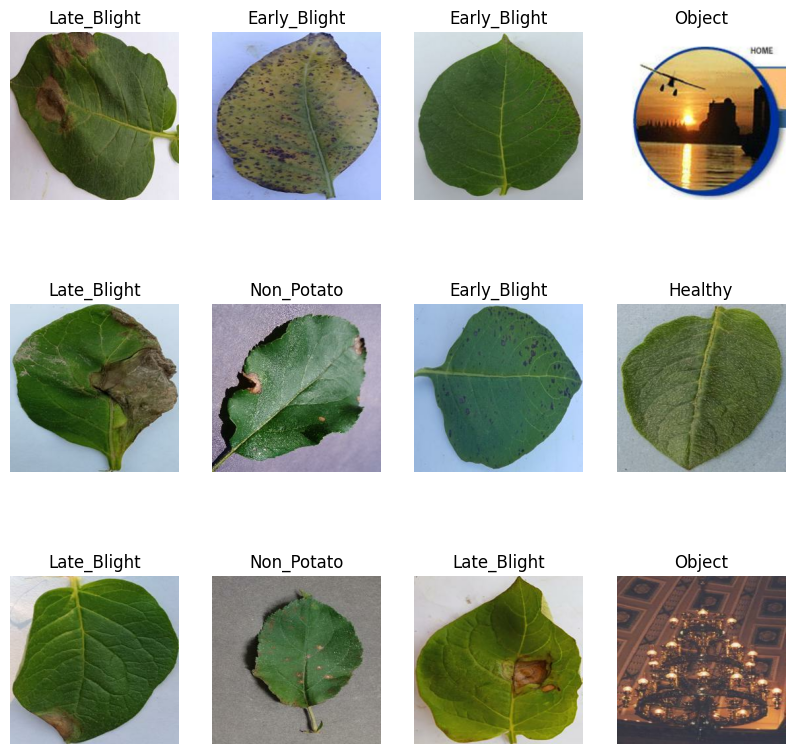

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
CHANNELS = 3
EPOCHS = 42

In [9]:
train_size = 0.8
len(df) * train_size  #126*0.8

151.20000000000002

In [10]:
val_n_test = len(df) - (len(df) * train_size)
val_n_test

37.79999999999998

In [11]:
def split_datasets(pc,train_split = 0.8,val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    if shuffle:
        pc = pc.shuffle(shuffle_size,seed = 10)
        
    pc_size = len(pc) 
    train_size = int(train_split*pc_size)
    val_size = int(val_split*pc_size)
    
    train_pc = pc.take(train_size) 
    val_pc = pc.skip(train_size).take(val_size) 
    test_pc = pc.skip(train_size).skip(val_size) 
                                        
    
    return train_pc, val_pc, test_pc

In [12]:
train_data, val_data, test_data = split_datasets(df)


In [13]:
print("Size of Data is :{0} \nBatch Size of Training Data is :{1} \nBatch Size of Validation Data :{2} \nBatch Size of Test Data :{3}"
      .format(len(df), len(train_data), len(val_data), len(test_data)))

Size of Data is :189 
Batch Size of Training Data is :151 
Batch Size of Validation Data :18 
Batch Size of Test Data :20


In [14]:
train_pc = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_pc = val_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_pc = test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
rescale_n_resize = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    tf.keras.layers.Rescaling(1./255)  
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal_and_vertical'), 
    tf.keras.layers.RandomRotation(factor=0.5)  
])

In [16]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    layers.Input(input_shape),
    rescale_n_resize,
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.build(input_shape=(None, *input_shape))


In [17]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=val_data, verbose=1)

Epoch 1/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 141s 849ms/step - accuracy: 0.4970 - loss: 1.1004 - val_accuracy: 0.6441 - val_loss: 0.7494
Epoch 2/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 96s 623ms/step - accuracy: 0.6783 - loss: 0.7485 - val_accuracy: 0.7622 - val_loss: 0.5790
Epoch 3/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 106s 686ms/step - accuracy: 0.7852 - loss: 0.5564 - val_accuracy: 0.8247 - val_loss: 0.4285
Epoch 4/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 93s 606ms/step - accuracy: 0.8389 - loss: 0.4334 - val_accuracy: 0.8455 - val_loss: 0.4607
Epoch 5/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 96s 620ms/step - accuracy: 0.8637 - loss: 0.3787 - val_accuracy: 0.9271 - val_loss: 0.2503
Epoch 6/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 145s 946ms/step - accuracy: 0.9020 - loss: 0.2735 - val_accuracy: 0.9201 - val_loss: 0.2393
Epoch 7/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 117s 760ms/step - accuracy: 0.8909 - loss: 0.2972 - val_accuracy: 0.9410 - val_loss: 0.1986
Epoch 8/42
151/151 ━━━━━━━━━━━━━━━━━━━━ 116s 751ms/step - accuracy: 0.9247 - lo

In [19]:
scores = model.evaluate(train_data)
print('overall loss,overall accuracy',scores)


151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - accuracy: 0.9801 - loss: 0.0609
overall loss,overall accuracy [0.0528729148209095, 0.9840216040611267]


In [20]:
test_loss, test_accuracy = model.evaluate(test_data)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9729 - loss: 0.0574


In [21]:
y_true = []
y_pred = []


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

for image_batch, label_batch in test_data:
    predictions = model.predict(image_batch)
    y_true.extend(label_batch.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm=confusion_matrix(y_true, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Precision: 0.9865541817289034
Recall: 0.9864583333333333
F1 Score: 0.9864642433965145


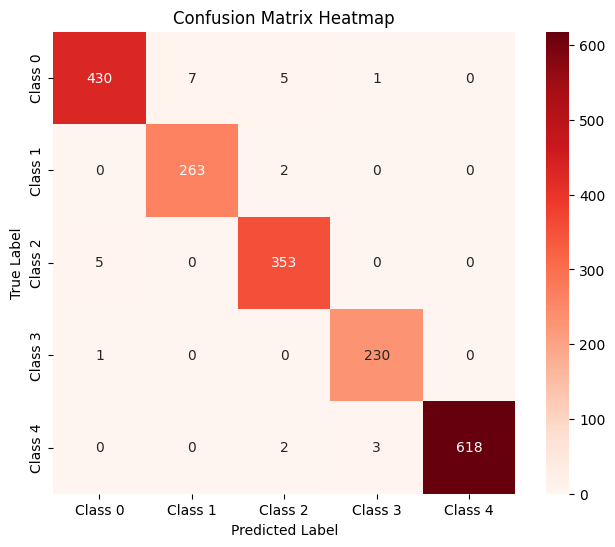

In [26]:
plt.figure(figsize=(8, 6))
class_names = [f'Class {i}' for i in range(len(cm))] 
sb.heatmap(cm, annot=True, square='True', fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [27]:

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [1]:


plt.figure(figsize=(15, 15))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), train_acc, 'r--', label='Training Accuracy') 
plt.plot(range(EPOCHS), val_acc, 'b-', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.xticks(np.arange(0, EPOCHS+1, step=5)) 
#plt.yticks(np.arange(0, 1.1, step=0.1)) 

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), train_loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.xticks(np.arange(0, EPOCHS+1, step=5))  # Equal divisions on x-axis
#plt.yticks(np.arange(0, max(max(train_loss), max(val_loss))+0.1, step=0.1))  

# Precision, Recall, and F1 Score plot
metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1 Score']
plt.subplot(2, 2, 3)
plt.bar(metric_names, metrics)
plt.title('Precision, Recall and F1 Score')
plt.xlabel('Truth values')
plt.ylabel('Predicted values')
#plt.ylim(0, 1) 
#plt.yticks(np.arange(0, 1.1, step=0.05))



NameError: name 'plt' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


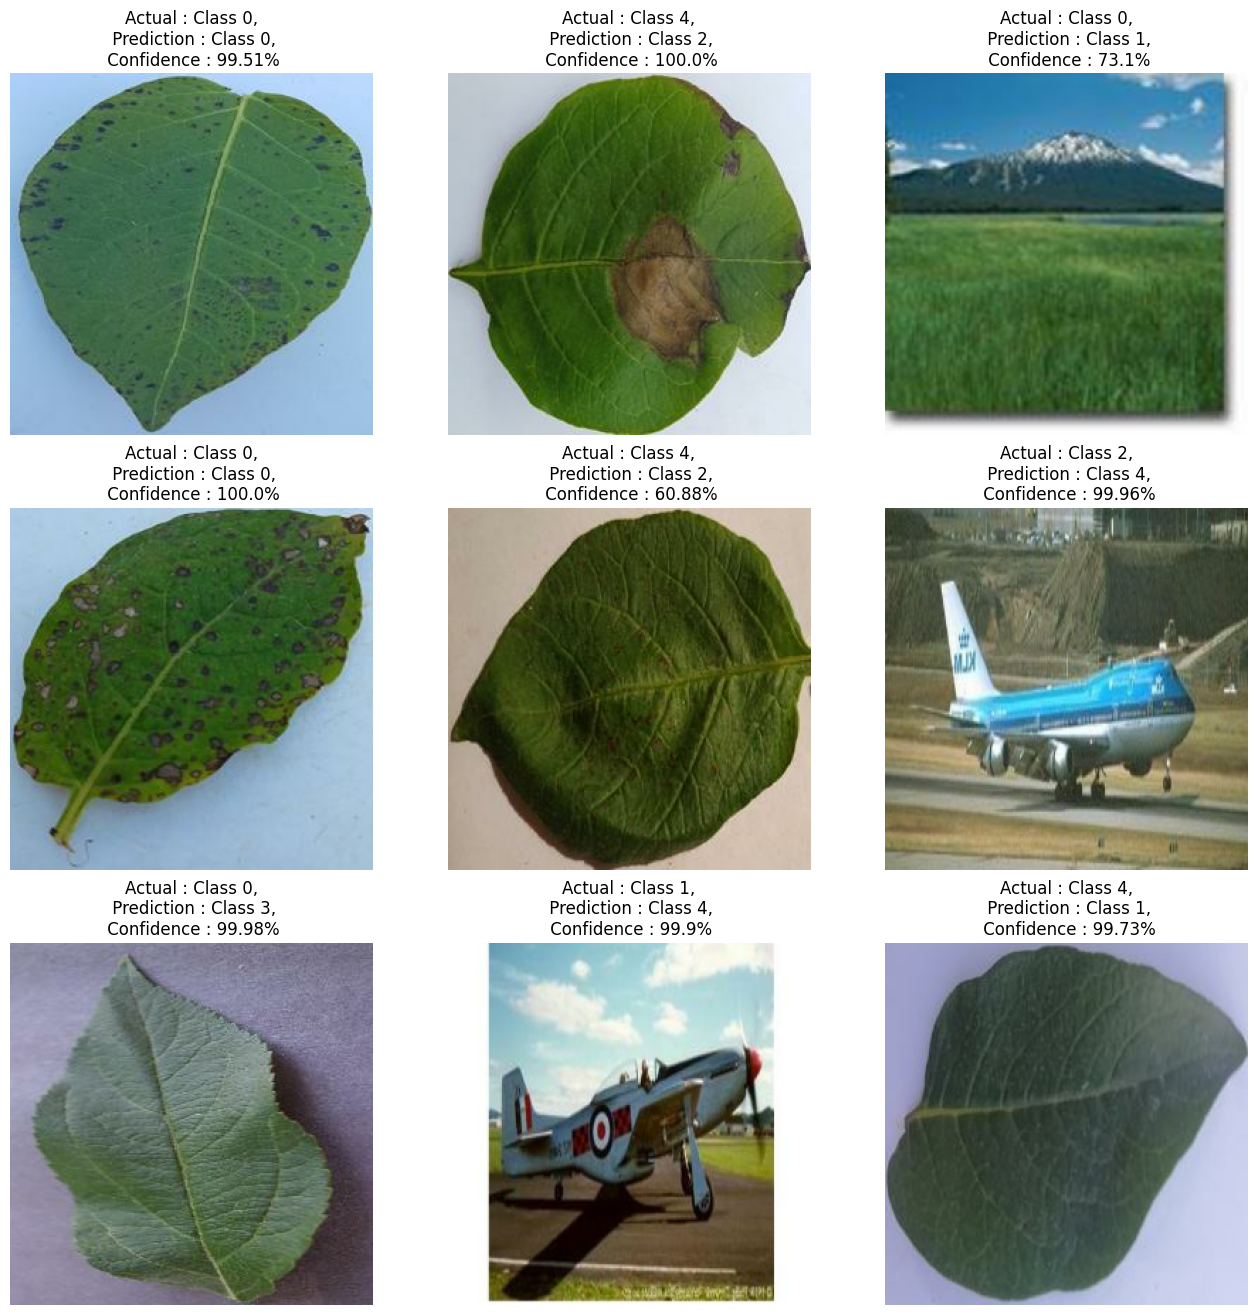

In [29]:
plt.figure(figsize = (16,16))
for batch_image, batch_label in test_pc.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[label_batch[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [30]:
unk_lf = tf.keras.preprocessing.image_dataset_from_directory("dataset\PLD_3_Classes_256\Testing",
                                                             image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 1584 files belonging to 5 classes.


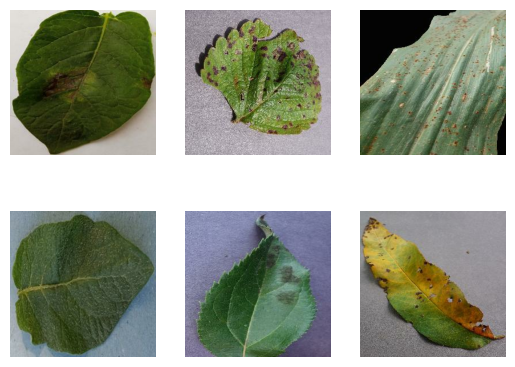

In [31]:
for image_batch, label_batch in unk_lf.take(1):
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


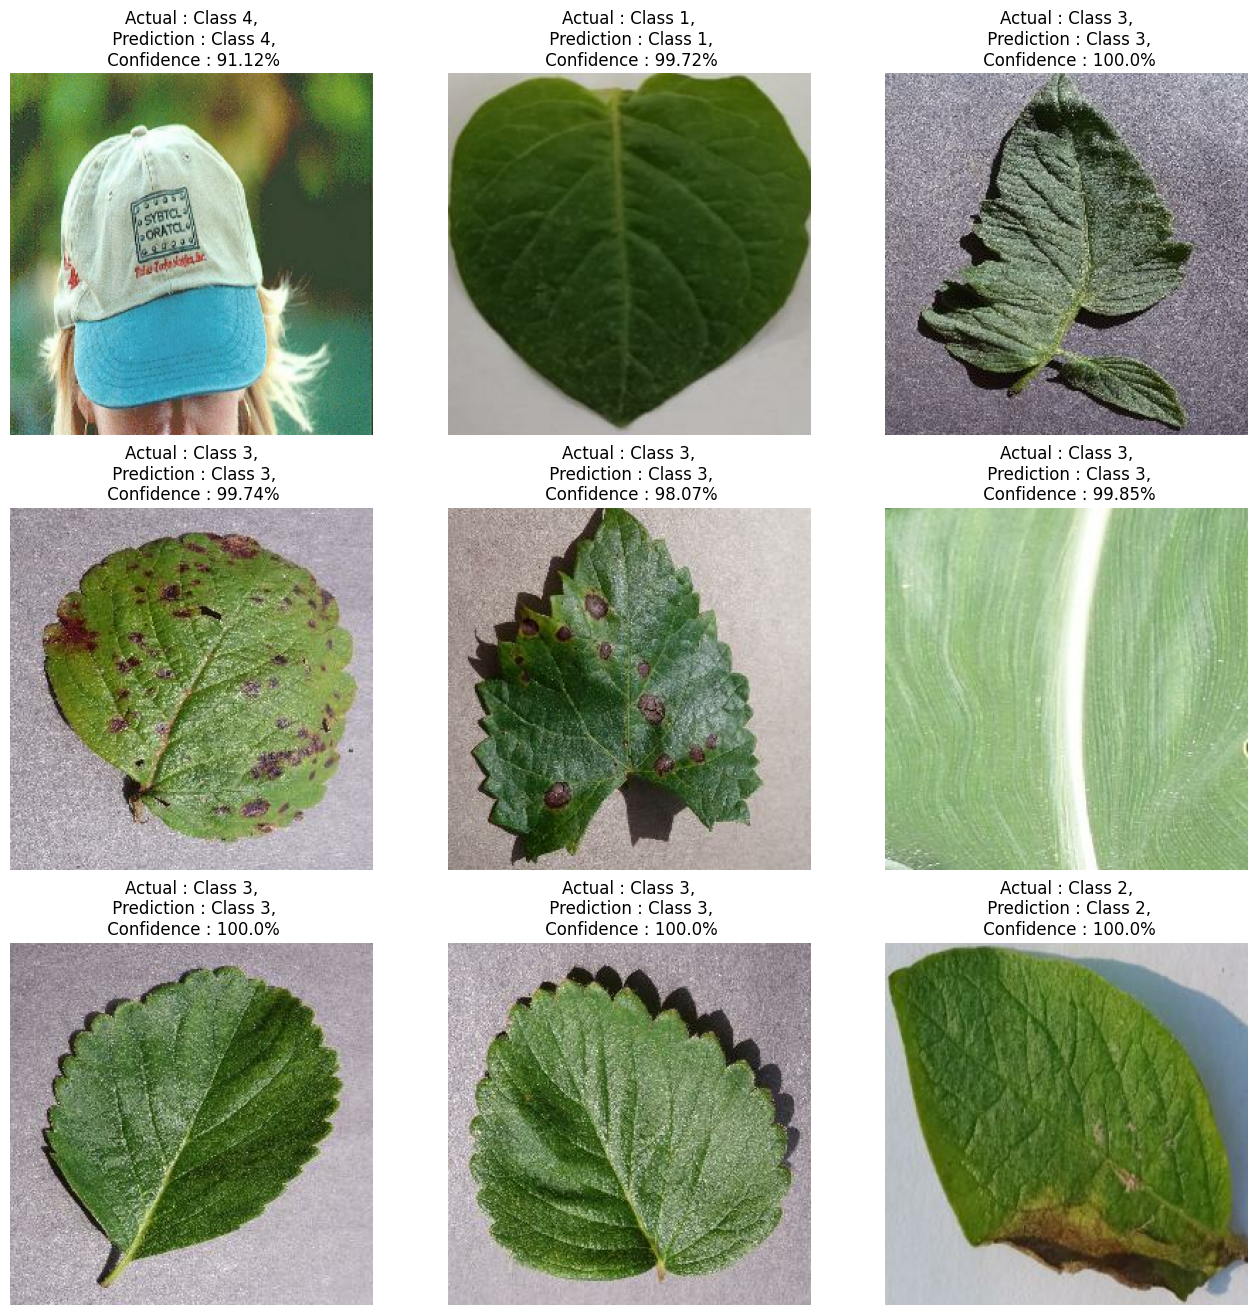

In [32]:
plt.figure(figsize = (16,16))
for batch_image, batch_label in unk_lf.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [33]:
model.save("saved_model_98.15_256.keras")

In [37]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(16*127*127, 10)  # Adjust according to the input dimensions

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        return x

model = MyModel()


In [39]:
# Install PyTorch
!pip install torch

# Verify PyTorch installation
import torch
print(torch.__version__)

# Assuming your model is named 'model' and you have an input tensor 'dummy_input'
import torch.onnx

dummy_input = torch.randn(32, 3, 256, 256)  # Adjust this to match your model's input shape
torch.onnx.export(model, dummy_input, "model.onnx", export_params=True)

# Verify the ONNX model
import onnx

onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)
print("The model is correctly saved in ONNX format.")



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2.3.1+cpu
The model is correctly saved in ONNX format.
